## Data Loading

In [1]:
# Import necessary libraries
import numpy as np  # Used for numerical operations
import pandas as pd  # Used for data manipulation and analysis
import matplotlib.pyplot as plt  # Used for plotting and data visualization

In [2]:
# Load the dataset from a TSV (tab-separated values) file
df = pd.read_csv('C:\\Users\\Minusha Attygala\\OneDrive\\Documents\\NLP\\Spam Text Classification/spam.tsv', sep='\t')

# Display the first few rows of the dataframe
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [3]:
# Check for any missing values in the dataset
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [4]:
# Get the shape of the dataframe (number of rows and columns)
df.shape

(5572, 4)

In [5]:
# Count the number of occurrences for each label ('ham' and 'spam')
df['label'].value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

## Dataset Balancing

In [6]:
# Separate the dataframe into two groups: 'ham' and 'spam'
ham = df[df['label'] == 'ham']  # Filter rows labeled as 'ham'
ham.shape  # Get the shape of the 'ham' dataframe

(4825, 4)

In [7]:
spam = df[df['label'] == 'spam']  # Filter rows labeled as 'spam'
spam.shape  # Get the shape of the 'spam' dataframe

(747, 4)

In [8]:
# Downsample the 'ham' messages to match the number of 'spam' messages for balanced data
ham = ham.sample(spam.shape[0])  # Randomly select a subset of 'ham' messages

In [9]:
ham.shape  # Check the new shape of the 'ham' dataframe

(747, 4)

In [10]:
# Combine the downsampled 'ham' and 'spam' dataframes into a single dataframe
data = pd.concat([ham, spam], axis=0, ignore_index=True)

In [11]:
# Check the shape of the combined dataframe
data.shape

(1494, 4)

In [12]:
# Display a random sample of 5 rows from the dataframe
data.sample(5)

,label,message,length,punct
588,ham,Crazy ar he's married. Ü like gd looking guys ...,159,8
134,ham,Early bird! Any purchases yet?,30,2
31,ham,Have you got Xmas radio times. If not i will g...,55,1
571,ham,Sorry I missed you babe. I was up late and sle...,132,9
441,ham,"I think we're going to finn's now, come",39,3


## Exploratory Data Analysis

In [13]:
# Set matplotlib configurations for better visualizations
plt.rcParams['figure.dpi'] = 200  # Set resolution for plots
plt.rcParams['figure.figsize'] = (10, 4)  # Set default plot size
plt.style.use('ggplot')  # Use the ggplot style for plots

In [14]:
# Check column names of the 'ham' dataframe
ham.columns

Index(['label', 'message', 'length', 'punct'], dtype='object')

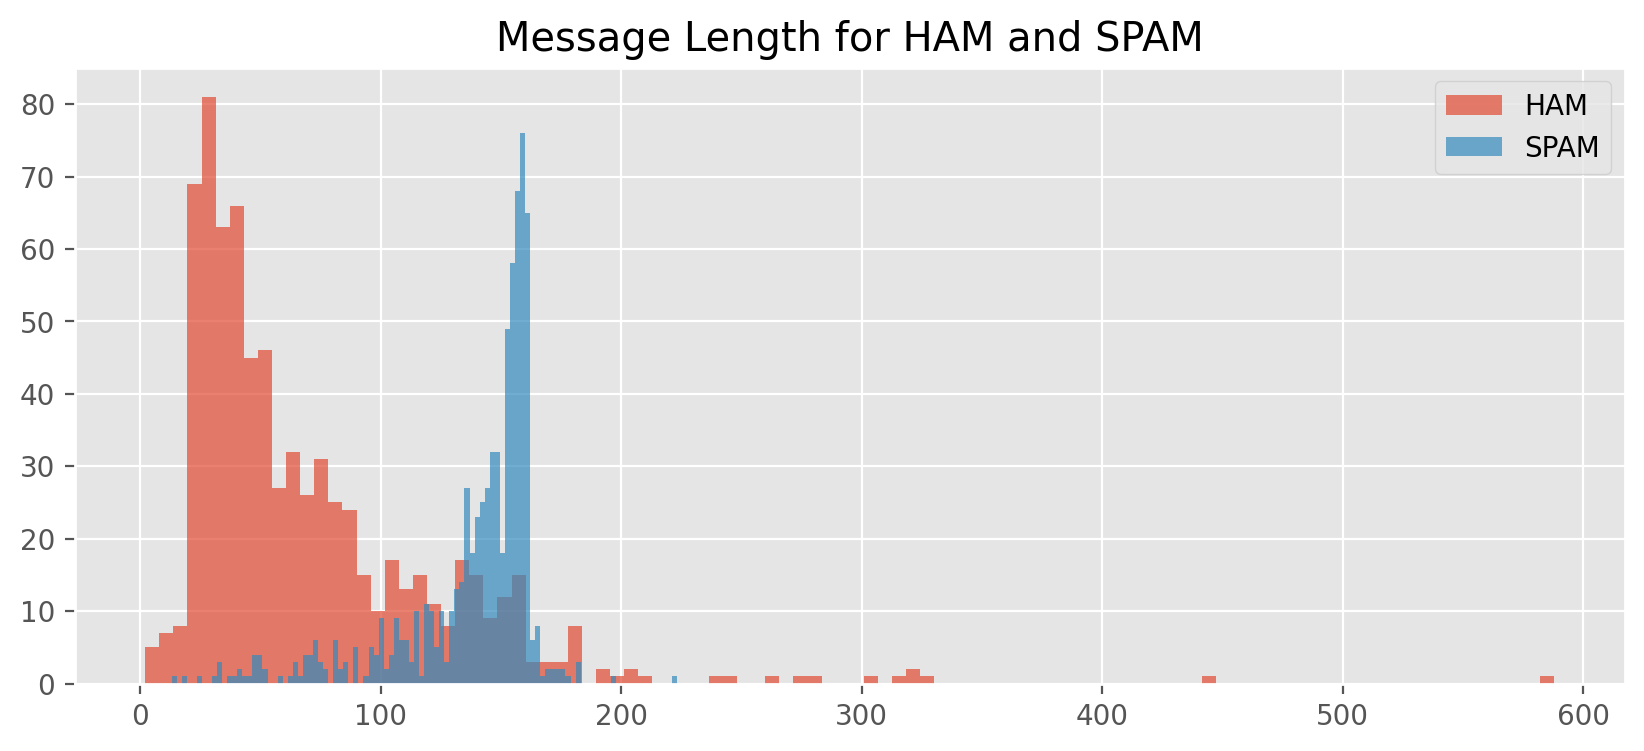

In [15]:
# Plot histograms of message lengths for 'ham' and 'spam' messages
plt.hist(ham['length'], bins=100, alpha=0.7, label='HAM')  # Histogram for 'ham'
plt.hist(spam['length'], bins=100, alpha=0.7, label='SPAM')  # Histogram for 'spam'
plt.title('Message Length for HAM and SPAM')  # Add a title to the plot
plt.legend()  # Add a legend to differentiate 'HAM' and 'SPAM'
plt.show()  # Display the plot

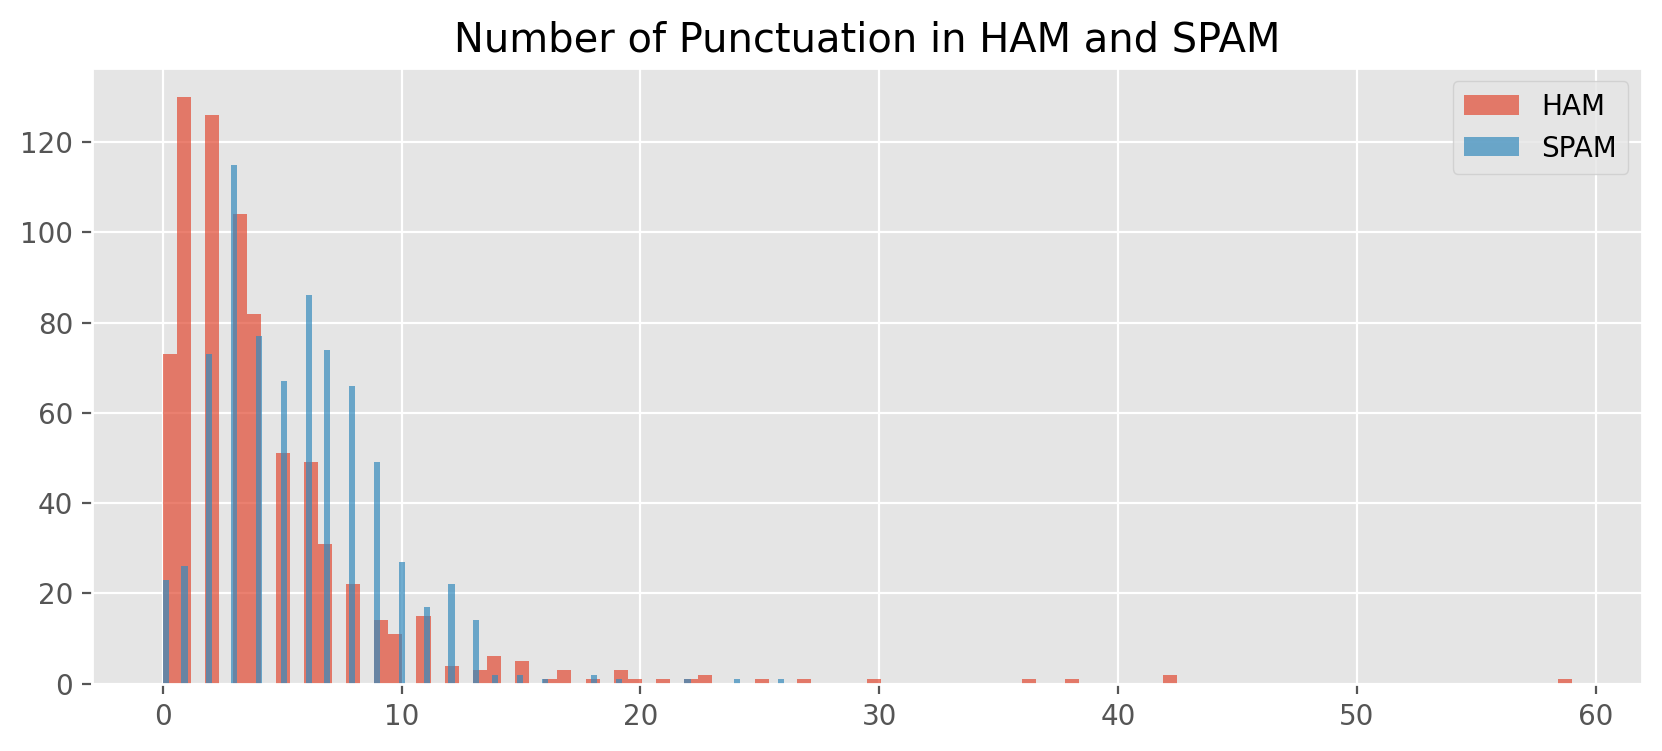

In [16]:
# Plot histograms of punctuation counts for 'ham' and 'spam' messages
plt.hist(ham['punct'], bins=100, alpha=0.7, label='HAM')  # Histogram for 'ham'
plt.hist(spam['punct'], bins=100, alpha=0.7, label='SPAM')  # Histogram for 'spam'
plt.title('Number of Punctuation in HAM and SPAM')  # Add a title to the plot
plt.legend()  # Add a legend to differentiate 'HAM' and 'SPAM'
plt.show()  # Display the plot

## Preprocessing and Splitting the Data

In [17]:
# Import additional libraries for machine learning
from sklearn.model_selection import train_test_split  # Split data into training and testing sets
from sklearn.ensemble import RandomForestClassifier  # Random forest model for classification
from sklearn.metrics import classification_report  # Generate evaluation metrics
from sklearn.pipeline import Pipeline  # Create a machine learning pipeline
from sklearn.feature_extraction.text import TfidfVectorizer  # Text feature extraction (TF-IDF)

In [18]:
# Split the data into training and testing sets with stratified sampling
X_train, X_test, y_train, y_test = train_test_split(
    data['message'],  # Feature: the message text
    data['label'],  # Target: 'ham' or 'spam' label
    test_size=0.2,  # Use 20% of data for testing
    random_state=0,  # Set a seed for reproducibility
    shuffle=True,  # Shuffle data before splitting
    stratify=data['label']  # Ensure class proportions are preserved in splits
)

# Check the shapes of the training and testing sets
X_train.shape, X_test.shape

((1195,), (299,))

## Build the Machine Learning Model

In [19]:
# Build the machine learning pipeline with TF-IDF vectorizer and Random Forest classifier
clf = Pipeline([
    ('tfidf', TfidfVectorizer()),  # Convert text data into TF-IDF features
    ('rfc', RandomForestClassifier(n_estimators=100, n_jobs=-1))  # Random forest with 100 estimators
])

# Train the pipeline on the training data
clf.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('rfc', RandomForestClassifier(n_jobs=-1))])

## Evaluate the Model

In [20]:
# Make predictions on the test set
y_pred = clf.predict(X_test)

In [21]:
# Print a classification report to evaluate the model's performance
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.91      0.99      0.95       150
        spam       0.99      0.91      0.95       149

    accuracy                           0.95       299
   macro avg       0.95      0.95      0.95       299
weighted avg       0.95      0.95      0.95       299



## Test the Model with Example Messages

In [22]:
# Test the model with example messages
clf.predict([
    'you have won lottery ticket worth $1000, please click here to claim',  # Likely spam
    'hi, how are you doing today?'  # Likely ham
])

array(['spam', 'ham'], dtype=object)

In [23]:
# Check the class labels ('ham' and 'spam')
clf.classes_

array(['ham', 'spam'], dtype=object)

## Save and Reload the Model

In [24]:
# Save the trained model using pickle
import pickle
pickle.dump(clf, open('model.pkl', 'wb'))  # Save the model to a file

In [25]:
# Load the saved model
model = pickle.load(open('model.pkl', 'rb'))

In [26]:
# Make predictions using the loaded model
model.predict([
    'you have won lottery ticket worth $1000, please click here to claim',  # Likely spam
    'hi, how are you doing today?'  # Likely ham
])

array(['spam', 'ham'], dtype=object)

## Check the Environment

In [27]:
# Print the current working directory
import os
print(os.getcwd())

C:\Users\Minusha Attygala\OneDrive\Documents\NLP\Spam Text Classification
